In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import calplot
import numpy as np
import impute as imp
import datetime

## Verifying the dataset

In [43]:
tmx=pd.read_csv('../../01_weather_data/01_raw_data/Temixco_2018_N006c.csv',index_col=0,parse_dates=True)
ann_test=pd.read_csv('../../01_weather_data/03_imputing_process/ann_me.csv',index_col=0,parse_dates=True)
sarima_test=pd.read_csv('../../01_weather_data/03_imputing_process/sarima_me.csv',index_col=0,parse_dates=True)


In [44]:
ann_test

,Direct,Global,Temperatura,Humedad,Presion,ws,wd,alturasolar,azimuth,prediccion,minutodia,me,mae
tiempo,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196,0.0,0,0.0,0.0
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742,0.0,10,0.0,0.0
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191,0.0,20,0.0,0.0
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016,0.0,30,0.0,0.0
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903,0.0,40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160,0.0,1390,0.0,0.0
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568,0.0,1400,0.0,0.0
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817,0.0,1410,0.0,0.0


Text(0.5, 1.0, 'Daily solar Energy')

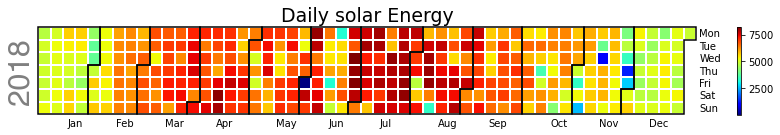

In [45]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
ann_d=ann_test.resample('D').mean()
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

## Pasting 02-June to 01-June

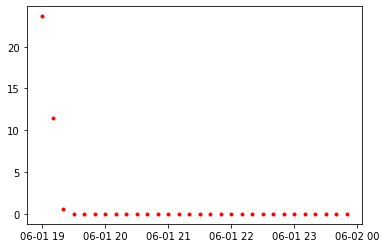

In [46]:
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')

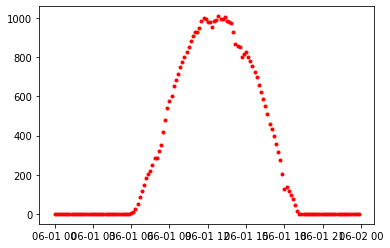

In [47]:
tmx_2=tmx.copy()
tmx['2018-06-01 00:00':'2018-06-02 00:00']=tmx_2['2018-06-02 00:00':'2018-06-03 00:00']
plt.plot(tmx.Ig.loc['2018-06-01'],'r.')
# Sustituir todas las variables

Text(0.5, 1.0, 'Daily solar Energy')

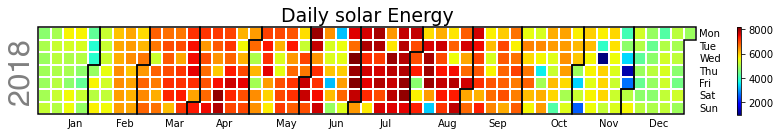

In [48]:
tmx['Eg']=tmx['Ig']/6
tmx_d=tmx.resample('D').sum()
tmx.fillna(0,inplace=True)
calplot.calplot(tmx_d['Eg'],cmap='jet',how='sum',edgecolor='black',linewidth=1.5)
plt.title('Daily solar Energy',fontsize=19)

# Recognizing the days to be selected

### Season 1 January:March

In [49]:
season1='2018-01-01'
season1e='2018-03-31'
imp.maxmin_season(tmx_d,'Eg',season1,season1e)

dia_maximo: 2018-03-29 00:00:00
dia_minimo: 2018-01-30 00:00:00


In [50]:
season1='2018-01-02'
season1e='2018-03-31'
imp.maxmin_season(ann_d,'mae',season1,season1e)

dia_maximo: 2018-01-30 00:00:00
dia_minimo: 2018-01-12 00:00:00


### Season 2 Apr:Jun

In [51]:
season2='2018-04-01'
season2e='2018-06-30'
imp.maxmin_season(tmx_d,'Eg',season2,season2e)

dia_maximo: 2018-06-27 00:00:00
dia_minimo: 2018-06-15 00:00:00


In [52]:

imp.maxmin_season(ann_d,'mae',season2,season2e)

dia_maximo: 2018-06-15 00:00:00
dia_minimo: 2018-04-17 00:00:00


### Season 3 Jul:Sept

In [53]:
season3='2018-07-01'
season3e='2018-09-30'
imp.maxmin_season(tmx_d,'Eg',season3,season3e)

dia_maximo: 2018-07-28 00:00:00
dia_minimo: 2018-08-12 00:00:00


In [54]:
imp.maxmin_season(ann_d,'mae',season3,season3e)

dia_maximo: 2018-08-12 00:00:00
dia_minimo: 2018-07-19 00:00:00


### Season 4 Oct:Dec

In [55]:
season4='2018-10-01'
season4e='2018-12-30'
imp.maxmin_season(tmx_d,'Eg',season4,season4e)

dia_maximo: 2018-10-05 00:00:00
dia_minimo: 2018-11-14 00:00:00


In [56]:
imp.maxmin_season(ann_d,'mae',season4,season4e)

dia_maximo: 2018-11-14 00:00:00
dia_minimo: 2018-12-21 00:00:00


## Exporting 2018 complete year 

In [57]:
# tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv')
#uncomment when necessary

# Deleting the min and max radiation days of each season 

In [58]:
days_solar_radiation=['2018-03-29','2018-01-30','2018-06-27','2018-06-15','2018-07-28','2018-08-12','2018-10-05','2018-11-14']
days_error=[
'2018-01-30', 
'2018-03-08',
'2018-06-15',
'2018-06-27',
'2018-08-12',
'2018-07-09',
# '2018-11-14',
'2018-11-15'
]
days_mae=['2018-01-30', #maximo
'2018-01-12', #minimo
'2018-06-15',
'2018-04-17',
'2018-08-12',
'2018-07-19',
'2018-11-14',
'2018-12-21',]
sdate = datetime.date(2018,1,1)   # start date
edate = datetime.date(2018,12,31) 
allyear=pd.date_range(sdate,edate-datetime.timedelta(days=0),freq='8d').strftime('%Y-%m-%d').tolist()

print('Deleted days:')
for x in allyear:#days_mae:
    imp.deleting_days(tmx.Ig,x)
    print(x)
    

Deleted days:
2018-01-01
2018-01-09
2018-01-17
2018-01-25
2018-02-02
2018-02-10
2018-02-18
2018-02-26
2018-03-06
2018-03-14
2018-03-22
2018-03-30
2018-04-07
2018-04-15
2018-04-23
2018-05-01
2018-05-09
2018-05-17
2018-05-25
2018-06-02
2018-06-10
2018-06-18
2018-06-26
2018-07-04
2018-07-12
2018-07-20
2018-07-28
2018-08-05
2018-08-13
2018-08-21
2018-08-29
2018-09-06
2018-09-14
2018-09-22
2018-09-30
2018-10-08
2018-10-16
2018-10-24
2018-11-01
2018-11-09
2018-11-17
2018-11-25
2018-12-03
2018-12-11
2018-12-19
2018-12-27


In [59]:
len(allyear)

46

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

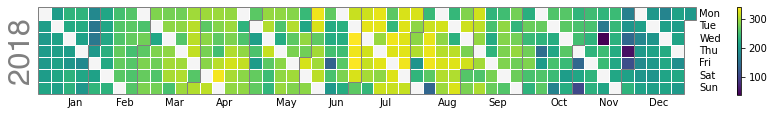

In [60]:

calplot.calplot(tmx.Ig,how='mean',dropzero=False)

### Exporting incomplete csv

In [84]:
tmx_epw=pd.read_csv("../../01_weather_data/04_to_EPWs/cnn_to_epw_mae.csv",names=['date','anio','mes','dia','hora','Ib','Ig','to','RH','P,''WS','WD','alturasolar','azimuth'],index_col=0,parse_dates=True)
tmx_epw

,anio,mes,dia,hora,Ib,Ig,to,RH,"P,WS",WD,alturasolar,azimuth
date,,,,,,,,,,,,
2018-01-01 00:10:00,2018,1,1,0,10,18.95,35.29,87876.37,0.0,0.0,283.700,1.008
2018-01-01 00:20:00,2018,1,1,0,20,18.94,35.43,87888.64,0.0,0.0,326.000,1.565
2018-01-01 00:30:00,2018,1,1,0,30,18.77,35.89,87887.21,0.0,0.0,354.500,2.175
2018-01-01 00:40:00,2018,1,1,0,40,18.81,36.34,87886.91,0.0,0.0,348.000,1.902
2018-01-01 00:50:00,2018,1,1,0,50,19.23,35.40,87889.36,0.0,0.0,6.668,1.468
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2018,12,31,23,10,18.51,47.29,87484.32,0.0,0.0,332.200,1.715
2018-12-31 23:20:00,2018,12,31,23,20,18.26,48.02,87470.70,0.0,0.0,320.500,1.703
2018-12-31 23:30:00,2018,12,31,23,30,18.39,46.84,87455.03,0.0,0.0,335.700,2.887


In [61]:
# tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/Temixco_2018_incomplete_maxmin_mae.csv')
tmx.to_csv('../../01_weather_data/03_imputing_process/01_test_data/empty_year.csv')
#Uncomment when needed

In [62]:
tmx

,Ib,Ig,To,RH,WS,WD,P,Eg
time,,,,,,,,
2018-01-01 00:00:00,0.000,NaN,18.70,36.34,1.422,316.0,87864.11,0.0
2018-01-01 00:10:00,0.002,NaN,18.95,35.29,1.008,283.7,87876.37,0.0
2018-01-01 00:20:00,0.170,NaN,18.94,35.43,1.565,326.0,87888.64,0.0
2018-01-01 00:30:00,0.371,NaN,18.77,35.89,2.175,354.5,87887.21,0.0
2018-01-01 00:40:00,0.305,NaN,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0
